## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [5]:
# 分類
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [6]:
digits = load_digits()
X = digits.data
y = digits.target
#y = LabelBinarizer().fit_transform(y) # 使用sklearn的LogisticRegression，不需要做onehot_encoding
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)
X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size = 0.2)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
classifier = LogisticRegression(multi_class = 'ovr' , random_state = 0)
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(y_test , y_pred)

Recall metric in the testing dataset:0.9361111111111111
accuracy metric in the testing dataset:0.9352843302007692


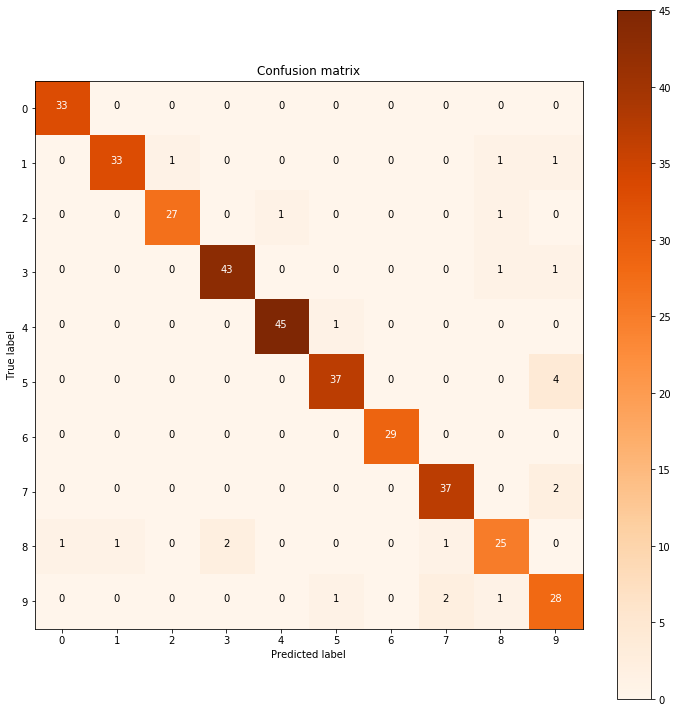

In [8]:
print("Recall metric in the testing dataset:{}"\
      .format(metrics.accuracy_score(y_test , y_pred)))
print("accuracy metric in the testing dataset:{}"\
      .format(metrics.precision_score(y_test , y_pred , average='macro')))

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = [i for i in range(0 , 10)]

plt.figure(figsize = (10 , 10))
plot_confusion_matrix(cnf_matrix , 
                      classes = class_names , 
                      title = 'Confusion matrix')
plt.show()

In [9]:
# 回歸
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
boston = datasets.load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
outcome = pd.DataFrame({'true_value':y_test , 'predict_value':y_pred})

C:\Users\peng\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


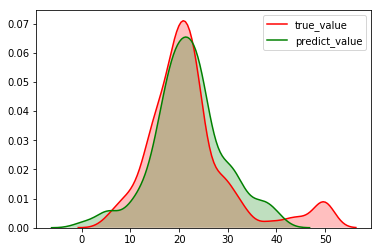

In [12]:
sns.kdeplot(outcome.iloc[: , 0] , shade=True, color="r")
sns.kdeplot(outcome.iloc[: , 1] , shade=True, color="g")